# Data Prep

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install scikit-learn

In [15]:
import pandas as pd

file_path = 'passes.csv'  
data = pd.read_csv(file_path)

print(data.head())

columns_to_keep = ['passedPlayerPosX', 'passedPlayerPosY', 'passedPlayerId', 
                   'receivedPlayerPosX', 'receivedPlayerPosY', 'receivedPlayerId']

for i in range(1, 10):
    columns_to_keep.append(f'teamMatePosX{i}')
    columns_to_keep.append(f'teamMatePosY{i}')
    columns_to_keep.append(f'teamMatePlayerId{i}')


filtered_data = data[columns_to_keep]

print(filtered_data.head())

#filled_data = filtered_data.fillna(method='bfill')
filled_data = filtered_data.dropna()

filled_data = filled_data.reset_index(drop=True)

filled_data.index = filled_data.index + 1

filled_data

   Unnamed: 0      timestamp ballId  ballposX  ballposY  \
0           0  1645114092600   3011        52      31.0   
1           1  1645114096200   3011        69      28.0   
2           2  1645114102200   3011        89      37.0   
3           3  1645114106600   3011        84      52.0   
4           4  1645114112200   3011        92      29.0   

                                        Match_id           matchDuration  \
0  0605D870-0921-4CF7-9398-E0433E8BB2F5_adjusted  0 days 01:14:33.600000   
1  0605D870-0921-4CF7-9398-E0433E8BB2F5_adjusted  0 days 01:14:33.600000   
2  0605D870-0921-4CF7-9398-E0433E8BB2F5_adjusted  0 days 01:14:33.600000   
3  0605D870-0921-4CF7-9398-E0433E8BB2F5_adjusted  0 days 01:14:33.600000   
4  0605D870-0921-4CF7-9398-E0433E8BB2F5_adjusted  0 days 01:14:33.600000   

       startTime  Type  passedPlayerId  ...  teamMatePlayerId7_xT_gained  \
0  1645114083200  Pass           95392  ...                        0.004   
1  1645114083200  Pass           953

,passedPlayerPosX,passedPlayerPosY,passedPlayerId,receivedPlayerPosX,receivedPlayerPosY,receivedPlayerId,teamMatePosX1,teamMatePosY1,teamMatePlayerId1,teamMatePosX2,...,teamMatePlayerId6,teamMatePosX7,teamMatePosY7,teamMatePlayerId7,teamMatePosX8,teamMatePosY8,teamMatePlayerId8,teamMatePosX9,teamMatePosY9,teamMatePlayerId9
1,92,21,95385,83.0,27.0,0.0,73.0,58.0,95393.0,74.0,...,95403.0,73.0,9.0,95372.0,63.0,32.0,95392.0,57.0,3.0,95397.0
2,83,54,95402,63.0,64.0,0.0,79.0,63.0,95393.0,69.0,...,95403.0,76.0,15.0,95372.0,56.0,39.0,95392.0,54.0,10.0,95397.0
3,61,63,95394,65.0,64.0,0.0,65.0,62.0,95393.0,61.0,...,95403.0,73.0,37.0,95372.0,54.0,55.0,95392.0,57.0,27.0,95397.0
4,50,61,95394,22.0,55.0,0.0,72.0,53.0,95393.0,63.0,...,95403.0,71.0,32.0,95372.0,45.0,54.0,95392.0,51.0,25.0,95397.0
5,11,53,95400,1.0,38.0,95404.0,19.0,32.0,95386.0,55.0,...,95381.0,35.0,36.0,95390.0,33.0,59.0,95391.0,24.0,54.0,95396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,64,42,95372,44.0,57.0,95398.0,56.0,30.0,95384.0,57.0,...,95385.0,74.0,23.0,95402.0,91.0,29.0,95403.0,46.0,6.0,95392.0
742,47,52,95398,11.0,47.0,0.0,46.0,39.0,95384.0,48.0,...,95385.0,65.0,27.0,95402.0,89.0,31.0,95403.0,41.0,45.0,95372.0
743,11,48,95375,23.0,55.0,95349.0,31.0,18.0,95386.0,48.0,...,95373.0,35.0,33.0,95390.0,52.0,12.0,95391.0,42.0,46.0,95396.0
744,24,48,95349,19.0,27.0,95373.0,34.0,15.0,95386.0,50.0,...,95381.0,34.0,36.0,95390.0,52.0,14.0,95391.0,45.0,45.0,95396.0


In [16]:
goalkeeperids = [95403, 95404, 95375, 95403.0, 95404.0, 95375.0]

In [17]:
import matplotlib.pyplot as plt

def draw_pitch():
    fig, ax = plt.subplots(figsize=(10, 6.4))
    
    plt.plot([0, 0, 100, 100, 0], [0, 64, 64, 0, 0], color="black")
    plt.plot([50, 50], [0, 64], color="black")
    plt.plot([0, 16.5, 16.5, 0], [11.85, 11.85, 52.15, 52.15], color="black")
    plt.plot([100, 83.5, 83.5, 100], [11.85, 11.85, 52.15, 52.15], color="black") 
    
    centre_circle = plt.Circle((50, 32), 9.15, color="black", fill=False)  
    ax.add_patch(centre_circle)
    centre_spot = plt.Circle((50, 32), 0.8, color="black")
    ax.add_patch(centre_spot)

    plt.plot([33.33, 33.33], [0, 64], color="black", linestyle="--") 
    plt.plot([66.66, 66.66], [0, 64], color="black", linestyle="--")  

    left_pen_spot = plt.Circle((6, 32), 0.8, color="black")
    ax.add_patch(left_pen_spot)
    right_pen_spot = plt.Circle((94, 32), 0.8, color="black")
    ax.add_patch(right_pen_spot)
    
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 64)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    return fig, ax

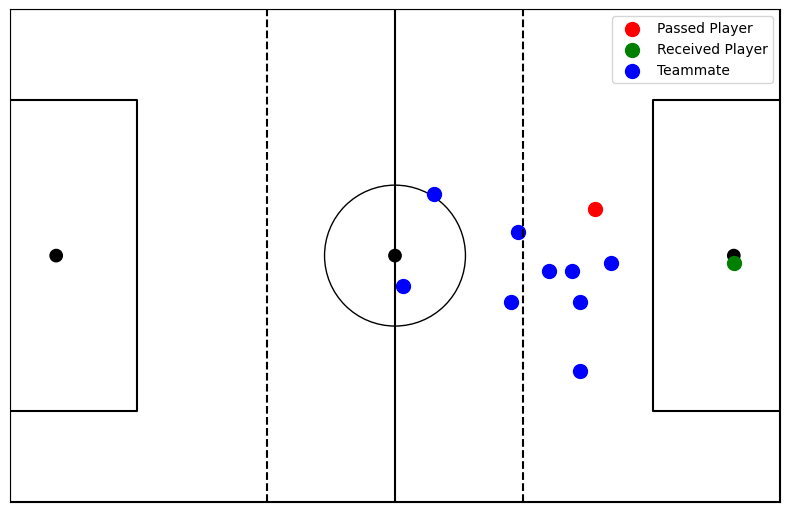

In [20]:
n = 15

fig, ax = draw_pitch()

ax.scatter(filled_data['passedPlayerPosX'][n], filled_data['passedPlayerPosY'][n], color='red', label='Passed Player', s=100, marker='o')

ax.scatter(filled_data['receivedPlayerPosX'][n], filled_data['receivedPlayerPosY'][n], color='green', label='Received Player', s=100, marker='o')

teammate_label_added = False

for i in range(1, 10):
    if not teammate_label_added:
        ax.scatter(filled_data[f'teamMatePosX{i}'][n], filled_data[f'teamMatePosY{i}'][n], color='blue', label='Teammate', s=100, marker='o')
        teammate_label_added = True
    else:
        ax.scatter(filled_data[f'teamMatePosX{i}'][n], filled_data[f'teamMatePosY{i}'][n], color='blue', s=100, marker='o')

ax.set_xlim([0, 100])
ax.set_ylim([0, 64])

plt.legend()

plt.show()

# K-Means

[0, 2, 0, 1, 1, 1, 1, 0, 0, 2]
Starting Zone: Defensive Zone
Ending Zone: Midfield Zone
Starting Line: Defensive Line
Ending Line: Attacking Line


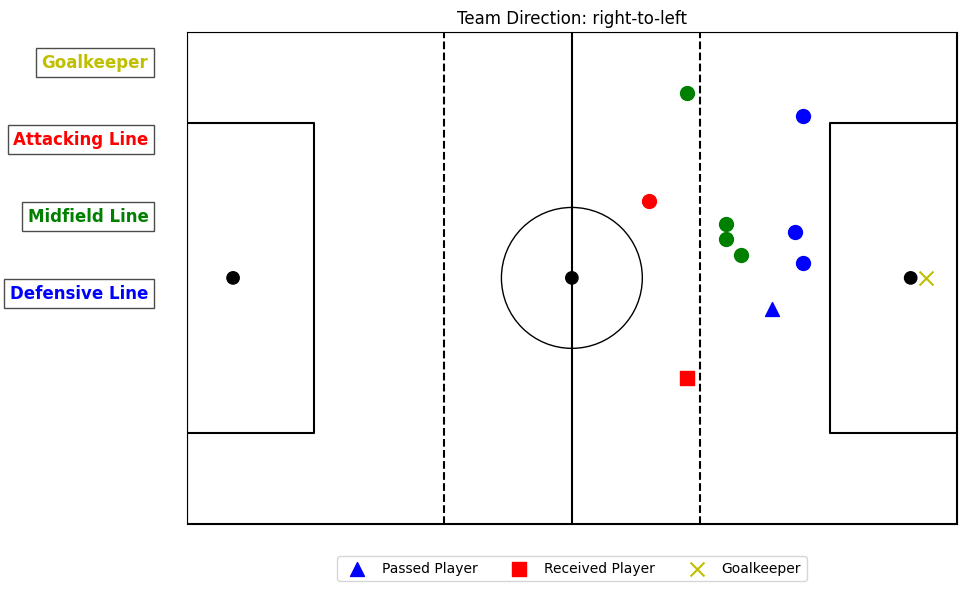

Davies-Bouldin Index (DBI): 0.7836834113059924
Silhouette Score: 0.414


In [152]:
import numpy as np
from sklearn.cluster import KMeans

n = 121 #3, 9, 10, 20, 21, 24, 25, 27, 28, 121, 356
check = 0

# Extract Players, exclude goalkeepers
if filled_data['passedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['passedPlayerPosX'][n]
    keeper_y = filled_data['passedPlayerPosY'][n]
    check = 1
elif filled_data['receivedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['passedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['receivedPlayerPosX'][n]
    keeper_y = filled_data['receivedPlayerPosY'][n]
    check = 2
else:
    players_x = [filled_data['passedPlayerPosX'][n], filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n], filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = None
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        possession_goalkeeper = filled_data[f'teamMatePosX{i}'][n]
        keeper_y = filled_data[f'teamMatePosY{i}'][n]
        continue
    players_x.append(filled_data[f'teamMatePosX{i}'][n])
    players_y.append(filled_data[f'teamMatePosY{i}'][n])


# Check what team is in possession based on goalkeeper, for line labels
if filled_data['passedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['receivedPlayerPosX'][n]
if filled_data['receivedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['passedPlayerPosX'][n]
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        goalkeeper_x = filled_data[f'teamMatePosX{i}'][n]
team_direction = 'left-to-right' if goalkeeper_x < 50 else 'right-to-left'

# Scale x-coordinate to get vertical clusters
positions = np.array(list(zip([x * 4 for x in players_x], players_y))) # 4, 5, 8 (3)

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=43).fit(positions)
cluster_labels = kmeans.labels_

# Sort clusters by x-coordinate based on team direction
centroids = kmeans.cluster_centers_
if team_direction == 'left-to-right':
    cluster_order = np.argsort(centroids[:, 0])  
else:
    cluster_order = np.argsort(centroids[:, 0])[::-1]  

# Map cluster labels to roles
role_colors = ['blue', 'green', 'red']
role_labels = ['Defensive Line', 'Midfield Line', 'Attacking Line']

cluster_to_role = {original: i for i, original in enumerate(cluster_order)}
mapped_labels = [cluster_to_role[label] for label in cluster_labels]
print(mapped_labels)

# Determine zones based on x-coordinate
pitch_length = 100
zone_labels = ['Defensive Zone', 'Midfield Zone', 'Attacking Zone']
if team_direction == 'left-to-right':
    zone_bounds = [pitch_length / 3, 2 * pitch_length / 3]
else:
    zone_bounds = [pitch_length - pitch_length / 3, pitch_length - 2 * pitch_length / 3]

def get_zone(x_coord):
    if team_direction == 'left-to-right':
        if x_coord < zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord < zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
    else:
        if x_coord > zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord > zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
        
def get_line(x_coord):
    if x_coord == 0:
        return 'Defensive Line'
    if x_coord == 1:
        return 'Midfield Line'
    else:
        return 'Attacking Line'
    
# Calculate starting/ending zones and lines
if check == 1:
    starting_zone = get_zone(possession_goalkeeper)
    starting_line = 'Goalkeeper'
    ending_zone = get_zone(players_x[0])
    ending_line = get_line(mapped_labels[0])
elif check == 2:
    starting_zone = get_zone(players_x[0])
    starting_line = get_line(mapped_labels[0])
    ending_zone = get_zone(possession_goalkeeper)
    ending_line = 'Goalkeeper'
elif check == 0:
    starting_zone = get_zone(players_x[0])
    ending_zone = get_zone(players_x[1])
    starting_line = get_line(mapped_labels[0])
    ending_line = get_line(mapped_labels[1])

# Print Results
print(f"Starting Zone: {starting_zone}")
print(f"Ending Zone: {ending_zone}")
print(f"Starting Line: {starting_line}")
print(f"Ending Line: {ending_line}")

# Visualization
fig, ax = draw_pitch()

# Plot passed player with circle ('o')
if check == 1:
    ax.scatter(possession_goalkeeper, keeper_y, color = 'y', s=100, marker='^', label='Passed Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[0], players_y[0], color=role_colors[mapped_labels[0]], s=100, marker='^', label='Passed Player')

# Plot received player with square ('s')
if check == 2:
    ax.scatter(possession_goalkeeper, keeper_y, color = 'y', s=100, marker='s', label='Recieved Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[1], players_y[1], color=role_colors[mapped_labels[1]], s=100, marker='s', label='Received Player')

if check == 0:
    ax.scatter(possession_goalkeeper, keeper_y, color = 'y', s=100, marker='x', label='Goalkeeper')
    for i in range(2, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')

# Add cluster labels 
side_labels_x = 105 if team_direction == 'left-to-right' else -5  
for i, role_label in enumerate(role_labels):
    ax.text(
        side_labels_x, 30 + i * 10, role_label, color=role_colors[i],
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )
ax.text(
        side_labels_x, 30 + 3 * 10, 'Goalkeeper', color='y',
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )

plt.title(f"Team Direction: {team_direction}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)
plt.show()

# Calculate inter-cluster separation (distances between centroids)
from sklearn.metrics import pairwise_distances
separation = pairwise_distances(centroids)

# Compute DBI
dbi = np.mean([
    max((scatter[i] + scatter[j]) / separation[i, j]
        for j in range(len(centroids)) if i != j)
    for i in range(len(centroids))
])

print(f"Davies-Bouldin Index (DBI): {dbi}")

from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(positions, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")

# Agglomerative Clustering

[0, 1, 0, 1, 1, 2, 1, 0, 0, 2]
Starting Zone: Defensive Zone
Ending Zone: Midfield Zone
Starting Line: Defensive Line
Ending Line: Midfield Line


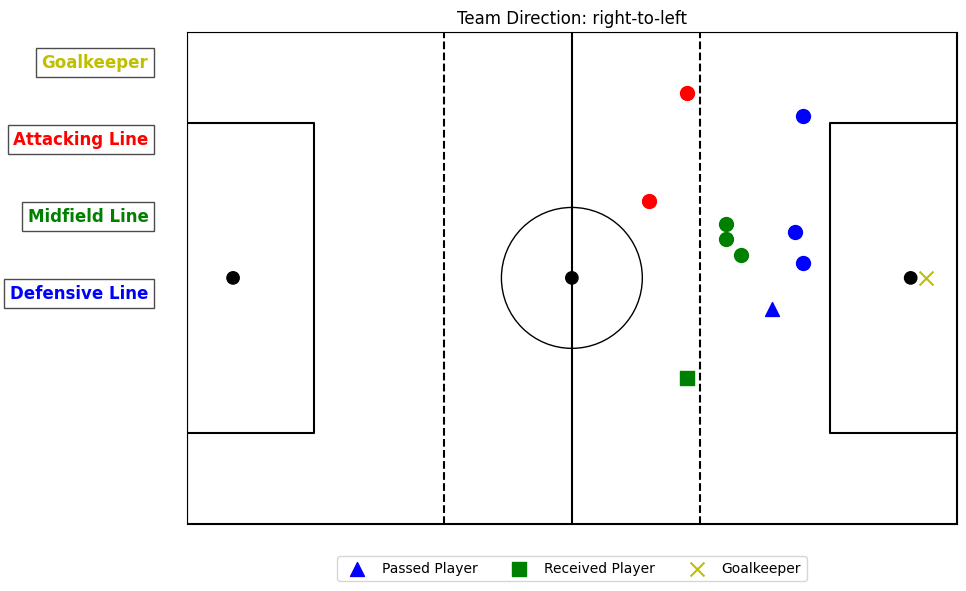

Davies-Bouldin Index (DBI): 0.7719373840626996
Silhouette Score: 0.461


In [153]:
from sklearn.cluster import AgglomerativeClustering

n = 121  # Example index, adjust as needed
check = 0

# Extract Players, exclude goalkeepers
if filled_data['passedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['passedPlayerPosX'][n]
    keeper_y = filled_data['passedPlayerPosY'][n]
    check = 1
elif filled_data['receivedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['passedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['receivedPlayerPosX'][n]
    keeper_y = filled_data['receivedPlayerPosY'][n]
    check = 2
else:
    players_x = [filled_data['passedPlayerPosX'][n], filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n], filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = None
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        possession_goalkeeper = filled_data[f'teamMatePosX{i}'][n]
        keeper_y = filled_data[f'teamMatePosY{i}'][n]
        continue
    players_x.append(filled_data[f'teamMatePosX{i}'][n])
    players_y.append(filled_data[f'teamMatePosY{i}'][n])

# Check what team is in possession based on goalkeeper, for line labels
if filled_data['passedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['receivedPlayerPosX'][n]
if filled_data['receivedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['passedPlayerPosX'][n]
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        goalkeeper_x = filled_data[f'teamMatePosX{i}'][n]
team_direction = 'left-to-right' if goalkeeper_x < 50 else 'right-to-left'

# Scale x-coordinate to get vertical clusters
positions = np.array(list(zip([x * 4 for x in players_x], players_y)))  # 4, 5, 8 (3)

# Run Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(positions)
cluster_labels = agg_cluster.labels_

# Sort clusters by x-coordinate based on team direction
centroids = np.array([positions[cluster_labels == i].mean(axis=0) for i in range(3)])  # Compute cluster centroids
if team_direction == 'left-to-right':
    cluster_order = np.argsort(centroids[:, 0])  
else:
    cluster_order = np.argsort(centroids[:, 0])[::-1]  

#enumerate clusters
role_colors = ['blue', 'green', 'red']
role_labels = ['Defensive Line', 'Midfield Line', 'Attacking Line']

cluster_to_role = {original: i for i, original in enumerate(cluster_order)}
mapped_labels = [cluster_to_role[label] for label in cluster_labels]
print(mapped_labels)

# Determine zones based on x-coordinate
pitch_length = 100
zone_labels = ['Defensive Zone', 'Midfield Zone', 'Attacking Zone']
if team_direction == 'left-to-right':
    zone_bounds = [pitch_length / 3, 2 * pitch_length / 3]
else:
    zone_bounds = [pitch_length - pitch_length / 3, pitch_length - 2 * pitch_length / 3]

def get_zone(x_coord):
    if team_direction == 'left-to-right':
        if x_coord < zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord < zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
    else:
        if x_coord > zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord > zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
        
def get_line(x_coord):
    if x_coord == 0:
        return 'Defensive Line'
    if x_coord == 1:
        return 'Midfield Line'
    else:
        return 'Attacking Line'

# Calculate starting/ending zones and lines
if check == 1:
    starting_zone = get_zone(possession_goalkeeper)
    starting_line = 'Goalkeeper'
    ending_zone = get_zone(players_x[0])
    ending_line = get_line(mapped_labels[0])
elif check == 2:
    starting_zone = get_zone(players_x[0])
    starting_line = get_line(mapped_labels[0])
    ending_zone = get_zone(possession_goalkeeper)
    ending_line = 'Goalkeeper'
elif check == 0:
    starting_zone = get_zone(players_x[0])
    ending_zone = get_zone(players_x[1])
    starting_line = get_line(mapped_labels[0])
    ending_line = get_line(mapped_labels[1])

# Print Results
print(f"Starting Zone: {starting_zone}")
print(f"Ending Zone: {ending_zone}")
print(f"Starting Line: {starting_line}")
print(f"Ending Line: {ending_line}")

# Visualization
fig, ax = draw_pitch()

# Plot passed player with circle ('o')
if check == 1:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='^', label='Passed Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[0], players_y[0], color=role_colors[mapped_labels[0]], s=100, marker='^', label='Passed Player')

# Plot received player with square ('s')
if check == 2:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='s', label='Received Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[1], players_y[1], color=role_colors[mapped_labels[1]], s=100, marker='s', label='Received Player')

if check == 0:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='x', label='Goalkeeper')
    for i in range(2, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')

# Add cluster labels
side_labels_x = 105 if team_direction == 'left-to-right' else -5
for i, role_label in enumerate(role_labels):
    ax.text(
        side_labels_x, 30 + i * 10, role_label, color=role_colors[i],
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )
ax.text(
        side_labels_x, 30 + 3 * 10, 'Goalkeeper', color='y',
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )

plt.title(f"Team Direction: {team_direction}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)
plt.show()

# Calculate inter-cluster separation (distances between centroids)
from sklearn.metrics import pairwise_distances
separation = pairwise_distances(centroids)

# Compute DBI
dbi = np.mean([
    max((scatter[i] + scatter[j]) / separation[i, j]
        for j in range(len(centroids)) if i != j)
    for i in range(len(centroids))
])

print(f"Davies-Bouldin Index (DBI): {dbi}")

from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(positions, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")

# Gaussian Mixture

[0, 2, 0, 1, 1, 1, 1, 0, 0, 2]
Starting Zone: Defensive Zone
Ending Zone: Midfield Zone
Starting Line: Defensive Line
Ending Line: Attacking Line


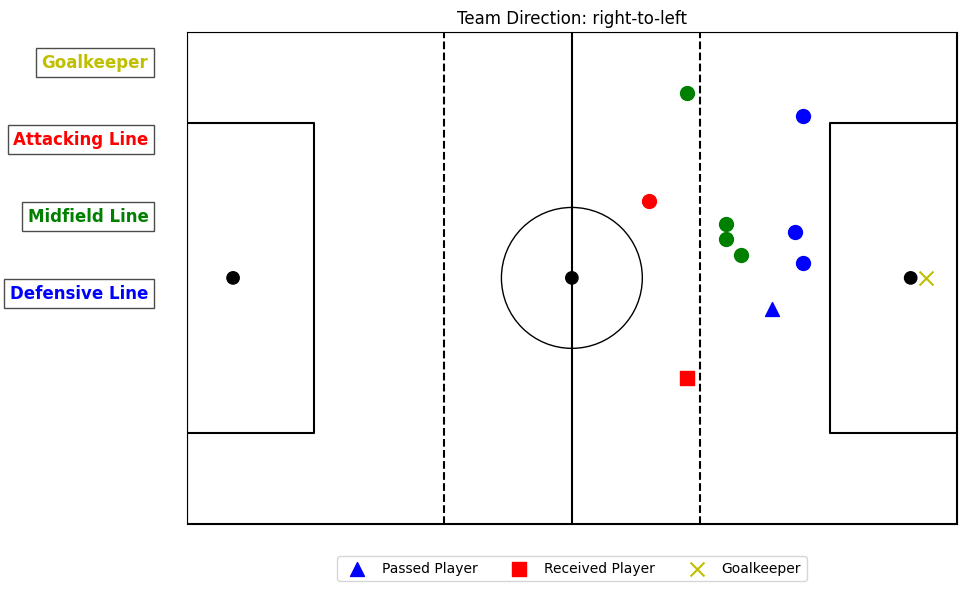

Davies-Bouldin Index (DBI): 0.7836831423001868
Silhouette Score: 0.414


In [151]:
from sklearn.mixture import GaussianMixture

n = 121  #3, 9, 10, 20, 21, 24, 25, 27, 28, 121, 356
check = 0

# Extract Players, exclude goalkeepers
if filled_data['passedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['passedPlayerPosX'][n]
    keeper_y = filled_data['passedPlayerPosY'][n]
    check = 1
elif filled_data['receivedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['passedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['receivedPlayerPosX'][n]
    keeper_y = filled_data['receivedPlayerPosY'][n]
    check = 2
else:
    players_x = [filled_data['passedPlayerPosX'][n], filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n], filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = None
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        possession_goalkeeper = filled_data[f'teamMatePosX{i}'][n]
        keeper_y = filled_data[f'teamMatePosY{i}'][n]
        continue
    players_x.append(filled_data[f'teamMatePosX{i}'][n])
    players_y.append(filled_data[f'teamMatePosY{i}'][n])

# Check what team is in possession based on goalkeeper, for line labels
if filled_data['passedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['receivedPlayerPosX'][n]
if filled_data['receivedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['passedPlayerPosX'][n]
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        goalkeeper_x = filled_data[f'teamMatePosX{i}'][n]
team_direction = 'left-to-right' if goalkeeper_x < 50 else 'right-to-left'

# Scale x-coordinate to get vertical clusters
positions = np.array(list(zip([x * 4 for x in players_x], players_y)))

# Run Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=43).fit(positions)
cluster_labels = gmm.predict(positions)

# Sort clusters by x-coordinate based on team direction
centroids = gmm.means_
if team_direction == 'left-to-right':
    cluster_order = np.argsort(centroids[:, 0])
else:
    cluster_order = np.argsort(centroids[:, 0])[::-1]

# Map cluster labels to roles
role_colors = ['blue', 'green', 'red']
role_labels = ['Defensive Line', 'Midfield Line', 'Attacking Line']

cluster_to_role = {original: i for i, original in enumerate(cluster_order)}
mapped_labels = [cluster_to_role[label] for label in cluster_labels]
print(mapped_labels)

# Determine zones based on x-coordinate
pitch_length = 100
zone_labels = ['Defensive Zone', 'Midfield Zone', 'Attacking Zone']
if team_direction == 'left-to-right':
    zone_bounds = [pitch_length / 3, 2 * pitch_length / 3]
else:
    zone_bounds = [pitch_length - pitch_length / 3, pitch_length - 2 * pitch_length / 3]

def get_zone(x_coord):
    if team_direction == 'left-to-right':
        if x_coord < zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord < zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
    else:
        if x_coord > zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord > zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'

def get_line(x_coord):
    if x_coord == 0:
        return 'Defensive Line'
    if x_coord == 1:
        return 'Midfield Line'
    else:
        return 'Attacking Line'

# Calculate starting/ending zones and lines
if check == 1:
    starting_zone = get_zone(possession_goalkeeper)
    starting_line = 'Goalkeeper'
    ending_zone = get_zone(players_x[0])
    ending_line = get_line(mapped_labels[0])
elif check == 2:
    starting_zone = get_zone(players_x[0])
    starting_line = get_line(mapped_labels[0])
    ending_zone = get_zone(possession_goalkeeper)
    ending_line = 'Goalkeeper'
elif check == 0:
    starting_zone = get_zone(players_x[0])
    ending_zone = get_zone(players_x[1])
    starting_line = get_line(mapped_labels[0])
    ending_line = get_line(mapped_labels[1])

# Print Results
print(f"Starting Zone: {starting_zone}")
print(f"Ending Zone: {ending_zone}")
print(f"Starting Line: {starting_line}")
print(f"Ending Line: {ending_line}")

# Visualization
fig, ax = draw_pitch()

# Plot passed player with circle ('o')
if check == 1:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='^', label='Passed Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[0], players_y[0], color=role_colors[mapped_labels[0]], s=100, marker='^', label='Passed Player')

# Plot received player with square ('s')
if check == 2:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='s', label='Received Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[1], players_y[1], color=role_colors[mapped_labels[1]], s=100, marker='s', label='Received Player')

if check == 0:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='x', label='Goalkeeper')
    for i in range(2, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')

# Add cluster labels 
side_labels_x = 105 if team_direction == 'left-to-right' else -5  
for i, role_label in enumerate(role_labels):
    ax.text(
        side_labels_x, 30 + i * 10, role_label, color=role_colors[i],
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )
ax.text(
    side_labels_x, 30 + 3 * 10, 'Goalkeeper', color='y',
    fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
    va='center', bbox=dict(facecolor='white', alpha=0.7)
)

plt.title(f"Team Direction: {team_direction}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)
plt.show()

scatter = [
    np.mean(np.linalg.norm(positions[np.array(cluster_labels) == i] - centroid, axis=1))
    for i, centroid in enumerate(centroids)
]

# Calculate inter-cluster separation (distances between centroids)
from sklearn.metrics import pairwise_distances
separation = pairwise_distances(centroids)

# Compute DBI
dbi = np.mean([
    max((scatter[i] + scatter[j]) / separation[i, j]
        for j in range(len(centroids)) if i != j)
    for i in range(len(centroids))
])

print(f"Davies-Bouldin Index (DBI): {dbi}")

from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(positions, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")

# Final (You don't have to run the other models, just data prep and this)

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Make results df
results = pd.DataFrame(columns=["Starting_zone", "Ending_zone", "Starting_line", "Ending_line"])

for n in range(1, len(filled_data)+1):
#for n in range(121, 122):   # This is for checking certain instances and their votes 
    check = 0
    # Extract Players, exclude goalkeepers (if statement for when keeper is passer or receiver)
    if filled_data['passedPlayerId'][n] in goalkeeperids:
        players_x = [filled_data['receivedPlayerPosX'][n]]
        players_y = [filled_data['receivedPlayerPosY'][n]]
        possession_goalkeeper = filled_data['passedPlayerPosX'][n]
        keeper_y = filled_data['passedPlayerPosY'][n]
        check = 1
    elif filled_data['receivedPlayerId'][n] in goalkeeperids:
        players_x = [filled_data['passedPlayerPosX'][n]]
        players_y = [filled_data['passedPlayerPosY'][n]]
        possession_goalkeeper = filled_data['receivedPlayerPosX'][n]
        keeper_y = filled_data['receivedPlayerPosY'][n]
        check = 2
    else:
        players_x = [filled_data['passedPlayerPosX'][n], filled_data['receivedPlayerPosX'][n]]
        players_y = [filled_data['passedPlayerPosY'][n], filled_data['receivedPlayerPosY'][n]]
        possession_goalkeeper = None
    for i in range(1, 10):
        if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
            possession_goalkeeper = filled_data[f'teamMatePosX{i}'][n]
            keeper_y = filled_data[f'teamMatePosY{i}'][n]
            continue
        players_x.append(filled_data[f'teamMatePosX{i}'][n])
        players_y.append(filled_data[f'teamMatePosY{i}'][n])


    # Check what team is in possession based on goalkeeper, for line labels
    if filled_data['passedPlayerId'][n] in goalkeeperids:
        goalkeeper_x = filled_data['receivedPlayerPosX'][n]
    if filled_data['receivedPlayerId'][n] in goalkeeperids:
        goalkeeper_x = filled_data['passedPlayerPosX'][n]
    for i in range(1, 10):
        if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
            goalkeeper_x = filled_data[f'teamMatePosX{i}'][n]
    team_direction = 'left-to-right' if goalkeeper_x < 50 else 'right-to-left'

    # Scale x-coordinate to get vertical clusters
    positions = np.array(list(zip([x * 4 for x in players_x], players_y))) # 4, 5, 8 (3)

    # Run models
    kmeans = KMeans(n_clusters=3, random_state=43).fit(positions)
    gmm = GaussianMixture(n_components=3, random_state=43).fit(positions)
    agglomerative = AgglomerativeClustering(n_clusters=3).fit(positions)

    all_labels = []

    for cluster_labels, centroids in zip(
        [kmeans.labels_, gmm.predict(positions), agglomerative.labels_],
        [kmeans.cluster_centers_, gmm.means_, np.array([positions[agglomerative.labels_ == i].mean(axis=0) for i in range(3)])],
    ):
        if team_direction == 'left-to-right':
            cluster_order = np.argsort(centroids[:, 0])  
        else:
            cluster_order = np.argsort(centroids[:, 0])[::-1]  
        cluster_to_role = {original: i for i, original in enumerate(cluster_order)}
        mapped_labels = [cluster_to_role[label] for label in cluster_labels]
        all_labels.append(mapped_labels)
   
    voted_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_labels)
    #print(all_labels)
    #print(voted_labels)

    # Determine zones based on x-coordinate
    pitch_length = 100
    if team_direction == 'left-to-right':
        zone_bounds = [pitch_length / 3, 2 * pitch_length / 3]
    else:
        zone_bounds = [pitch_length - pitch_length / 3, pitch_length - 2 * pitch_length / 3]

    def get_zone(x_coord):
        if team_direction == 'left-to-right':
            if x_coord < zone_bounds[0]:
                return 'Defensive Zone'
            elif x_coord < zone_bounds[1]:
                return 'Midfield Zone'
            else:
                return 'Attacking Zone'
        else:
            if x_coord > zone_bounds[0]:
                return 'Defensive Zone'
            elif x_coord > zone_bounds[1]:
                return 'Midfield Zone'
            else:
                return 'Attacking Zone'
            
    def get_line(x_coord):
        if x_coord == 0:
            return 'Defensive Line'
        if x_coord == 1:
            return 'Midfield Line'
        else:
            return 'Attacking Line'
    
    # Calculate starting/ending zones and lines
    if check == 1:
        starting_zone = get_zone(possession_goalkeeper)
        starting_line = 'Goalkeeper'
        ending_zone = get_zone(players_x[0])
        ending_line = get_line(voted_labels[0])
    elif check == 2:
        starting_zone = get_zone(players_x[0])
        starting_line = get_line(voted_labels[0])
        ending_zone = get_zone(possession_goalkeeper)
        ending_line = 'Goalkeeper'
    elif check == 0:
        starting_zone = get_zone(players_x[0])
        ending_zone = get_zone(players_x[1])
        starting_line = get_line(voted_labels[0])
        ending_line = get_line(voted_labels[1])

    results = pd.concat([results, pd.DataFrame({
        "Starting_zone": [starting_zone],
        "Ending_zone": [ending_zone],
        "Starting_line": [starting_line],
        "Ending_line": [ending_line],
    })], ignore_index = True)

print(results)
results.index = range(1, len(results) + 1)
results.to_csv("passing_results.csv", index=False)

# SOM 

In [54]:
pip install minisom


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11777 sha256=5557e086964131a3795b70645bd48832059d2eeef70708dcc2201f34ed2f53c1
  Stored in directory: c:\users\daan-\appdata\local\pip\cache\wheels\a8\8c\ac\f0ff71726624632f034b6643dc71d1e9164636e0444a965755
Successfully built minisom


Starting Zone: Defensive Zone
Ending Zone: Defensive Zone
Starting Line: Defensive Line
Ending Line: Defensive Line


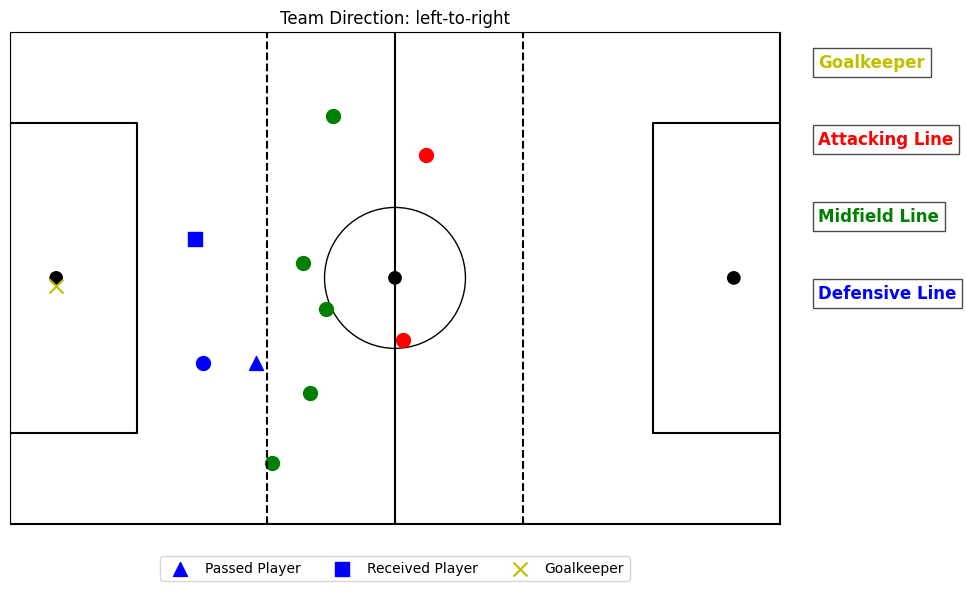

In [62]:
from minisom import MiniSom

n = 10  # Example match/event index
check = 0

# Extract Players, exclude goalkeepers
if filled_data['passedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['passedPlayerPosX'][n]
    keeper_y = filled_data['passedPlayerPosY'][n]
    check = 1
elif filled_data['receivedPlayerId'][n] in goalkeeperids:
    players_x = [filled_data['passedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n]]
    possession_goalkeeper = filled_data['receivedPlayerPosX'][n]
    keeper_y = filled_data['receivedPlayerPosY'][n]
    check = 2
else:
    players_x = [filled_data['passedPlayerPosX'][n], filled_data['receivedPlayerPosX'][n]]
    players_y = [filled_data['passedPlayerPosY'][n], filled_data['receivedPlayerPosY'][n]]
    possession_goalkeeper = None
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        possession_goalkeeper = filled_data[f'teamMatePosX{i}'][n]
        keeper_y = filled_data[f'teamMatePosY{i}'][n]
        continue
    players_x.append(filled_data[f'teamMatePosX{i}'][n])
    players_y.append(filled_data[f'teamMatePosY{i}'][n])

# Check what team is in possession based on goalkeeper, for line labels
if filled_data['passedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['receivedPlayerPosX'][n]
if filled_data['receivedPlayerId'][n] in goalkeeperids:
    goalkeeper_x = filled_data['passedPlayerPosX'][n]
for i in range(1, 10):
    if filled_data[f'teamMatePlayerId{i}'][n] in goalkeeperids:
        goalkeeper_x = filled_data[f'teamMatePosX{i}'][n]
team_direction = 'left-to-right' if goalkeeper_x < 50 else 'right-to-left'

# Scale x-coordinate to get vertical clusters
positions = np.array(list(zip([x * 4 for x in players_x], players_y)))

# Self-Organizing Map (SOM)
som_width, som_height = 1, 3  # Map dimensions for vertical clustering
som = MiniSom(som_width, som_height, positions.shape[1], sigma=1.0, learning_rate=0.5, random_seed=43)
som.train_random(positions, 100)

# Assign clusters
cluster_labels = [som.winner(pos)[1] for pos in positions]

# Sort clusters by x-coordinate based on team direction
centroids = som.get_weights().reshape(-1, positions.shape[1])
if team_direction == 'left-to-right':
    cluster_order = np.argsort(centroids[:, 0])
else:
    cluster_order = np.argsort(centroids[:, 0])[::-1]

# Map cluster labels to roles
role_colors = ['blue', 'green', 'red']
role_labels = ['Defensive Line', 'Midfield Line', 'Attacking Line']

cluster_to_role = {original: i for i, original in enumerate(cluster_order)}
mapped_labels = [cluster_to_role[label] for label in cluster_labels]

# Determine zones based on x-coordinate
pitch_length = 100
zone_labels = ['Defensive Zone', 'Midfield Zone', 'Attacking Zone']
if team_direction == 'left-to-right':
    zone_bounds = [pitch_length / 3, 2 * pitch_length / 3]
else:
    zone_bounds = [pitch_length - pitch_length / 3, pitch_length - 2 * pitch_length / 3]

def get_zone(x_coord):
    if team_direction == 'left-to-right':
        if x_coord < zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord < zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'
    else:
        if x_coord > zone_bounds[0]:
            return 'Defensive Zone'
        elif x_coord > zone_bounds[1]:
            return 'Midfield Zone'
        else:
            return 'Attacking Zone'

def get_line(x_coord):
    if x_coord == 0:
        return 'Defensive Line'
    if x_coord == 1:
        return 'Midfield Line'
    else:
        return 'Attacking Line'

# Calculate starting/ending zones and lines
if check == 1:
    starting_zone = get_zone(possession_goalkeeper)
    starting_line = 'Goalkeeper'
    ending_zone = get_zone(players_x[0])
    ending_line = get_line(mapped_labels[0])
elif check == 2:
    starting_zone = get_zone(players_x[0])
    starting_line = get_line(mapped_labels[0])
    ending_zone = get_zone(possession_goalkeeper)
    ending_line = 'Goalkeeper'
elif check == 0:
    starting_zone = get_zone(players_x[0])
    ending_zone = get_zone(players_x[1])
    starting_line = get_line(mapped_labels[0])
    ending_line = get_line(mapped_labels[1])

# Print Results
print(f"Starting Zone: {starting_zone}")
print(f"Ending Zone: {ending_zone}")
print(f"Starting Line: {starting_line}")
print(f"Ending Line: {ending_line}")

# Visualization
fig, ax = draw_pitch()

# Plot passed player with circle ('o')
if check == 1:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='^', label='Passed Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[0], players_y[0], color=role_colors[mapped_labels[0]], s=100, marker='^', label='Passed Player')

# Plot received player with square ('s')
if check == 2:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='s', label='Received Player (Goalkeeper)')
    for i in range(1, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')
else:
    ax.scatter(players_x[1], players_y[1], color=role_colors[mapped_labels[1]], s=100, marker='s', label='Received Player')

if check == 0:
    ax.scatter(possession_goalkeeper, keeper_y, color='y', s=100, marker='x', label='Goalkeeper')
    for i in range(2, len(players_x)):
        ax.scatter(players_x[i], players_y[i], color=role_colors[mapped_labels[i]], s=100, marker='o')

# Add cluster labels 
side_labels_x = 105 if team_direction == 'left-to-right' else -5  
for i, role_label in enumerate(role_labels):
    ax.text(
        side_labels_x, 30 + i * 10, role_label, color=role_colors[i],
        fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
        va='center', bbox=dict(facecolor='white', alpha=0.7)
    )
ax.text(
    side_labels_x, 30 + 3 * 10, 'Goalkeeper', color='y',
    fontsize=12, fontweight='bold', ha='left' if team_direction == 'left-to-right' else 'right',
    va='center', bbox=dict(facecolor='white', alpha=0.7)
)

plt.title(f"Team Direction: {team_direction}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=10)
plt.show()